**Perceptron**

$\textbf{Steps}$:

1. Initialize the weights. Weights may be initialized to $0$ or to a small random value. In the example below, we use $0$.

2. For each example $j$ in our training set $D$, perform the following steps over the input $\mathbf{x}_{j}$ and desired output $d_{j}$:

$\qquad$ (a) Calculate the actual output:
\begin{aligned}y_{j}(t)&=f[\mathbf {w} (t)\cdot \mathbf {x} _{j}]\\&=f[w_{0}(t)x_{j,0}+w_{1}(t)x_{j,1}+w_{2}(t)x_{j,2}+\ldots +w_{n}(t)x_{j,n}]\end{aligned}

$\qquad$ (b) Update the weights:
\begin{aligned}
w_i(t+1) = w_i(t) + \lambda \cdot (d_{j} - y_{j}(t)) \cdot x_{j,i},
\end{aligned}
$\qquad$ for all features $0\leq i \leq n$ where $\lambda$ is the learning rate.

For offline learning, the second step may be repeated until the iteration error $\frac {1}{s} \sum_{j=1}^{s} \vert d_{j}-y_{j}(t) \vert$ is less than a user-specified error threshold $\gamma$, or a predetermined number of iterations have been completed, where $s$ is the size of the sample set.

In [1]:
# importing Python library
import numpy as np
import random

# define Unit Step Function
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

# design Perceptron Model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y


In [2]:
X=[[0,0],[0,1],[1,0],[1,1]]

In [3]:
augmented_X=[[0,0,0],[0,1,1],[1,0,1],[1,1,1]]

In [4]:
perceptronModel([0,1], [0.1,-0.5],-1)

0

In [5]:
init_w=np.random.rand(2)
init_b=random.random()

In [6]:
print(list(init_w))
print(init_b)

[0.8602161190348728, 0.8152485675895731]
0.6543537387933749


In [7]:
perceptronModel(X[0], init_w, init_b)

1

In [8]:
lr=0.1
epochs=10
weights=init_w
b=-1
for epoch in range(epochs):
  error_sum=0
  for x in augmented_X:
    y=perceptronModel(x[:-1], weights, -1)
    error = x[-1] - y
    error_sum+=np.abs(error)
    new_weights=[]
    for i in range(len(weights)): #update weights
      new_weights.append(weights[i]+lr*error*x[i])
    weights=new_weights
  print(error_sum)

2
2
0
0
0
0
0
0
0
0


In [9]:
weights

[1.060216119034873, 1.015248567589573]

In [10]:
def decision_boundary(x, weights):
  #w1*x1 + w2*x2 - 1 = 0
  #x2 = 1/w2 - (w1/w2) * x1
  y = 1/weights[1] - (weights[0]/weights[1])*x
  return y

In [11]:
weights

[1.060216119034873, 1.015248567589573]

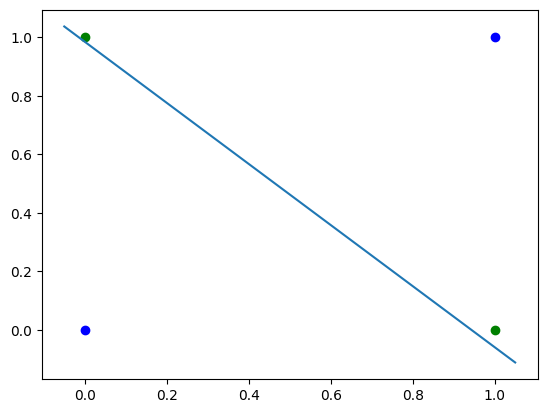

In [12]:
import matplotlib.pyplot as plt
x_interval = np.linspace(-0.05,1.05,150)
y = decision_boundary(x_interval, weights)
plt.scatter(X[0][0],X[0][1],color="blue")
plt.scatter(X[1][0],X[1][1],color="green")
plt.scatter(X[2][0],X[2][1],color="green")
plt.scatter(X[3][0],X[3][1],color="blue")
plt.plot(x_interval,y)
#plt.ylim(-0.05,1.05)
plt.show()

In [13]:
for elem in X:
  print(elem)
  print(str(elem) + ': ' + str(perceptronModel(elem, weights, -1)) )

[0, 0]
[0, 0]: 0
[0, 1]
[0, 1]: 1
[1, 0]
[1, 0]: 1
[1, 1]
[1, 1]: 1
